## Using Tensorflow (Task 4)

Epoch: 0 	Loss: 0.54569423 	Accuracy: 68.08803301237964
Accuracy on Validation Dataset:  69.8005698005698
Epoch: 100 	Loss: 0.24689627 	Accuracy: 88.17635270541082
Accuracy on Validation Dataset:  87.39837398373984
Epoch: 200 	Loss: 0.24652076 	Accuracy: 88.17635270541082
Accuracy on Validation Dataset:  87.14859437751004
Epoch: 300 	Loss: 0.24650988 	Accuracy: 88.12877263581488
Accuracy on Validation Dataset:  87.39837398373984
Epoch: 400 	Loss: 0.246476 	Accuracy: 87.97595190380761
Accuracy on Validation Dataset:  87.09677419354838
Epoch: 500 	Loss: 0.24644838 	Accuracy: 87.97595190380761
Accuracy on Validation Dataset:  87.09677419354838
Epoch: 600 	Loss: 0.24651703 	Accuracy: 88.04780876494024
Accuracy on Validation Dataset:  87.09677419354838
Epoch: 700 	Loss: 0.24650681 	Accuracy: 88.04780876494024
Accuracy on Validation Dataset:  87.09677419354838
Epoch: 800 	Loss: 0.24645859 	Accuracy: 87.97595190380761
Accuracy on Validation Dataset:  87.09677419354838
Epoch: 900 	Loss: 0.2464

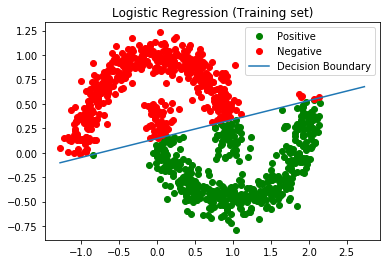

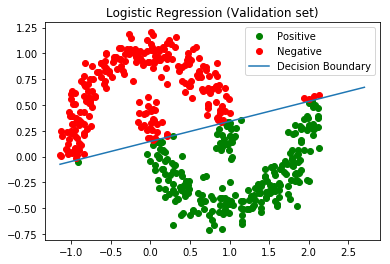

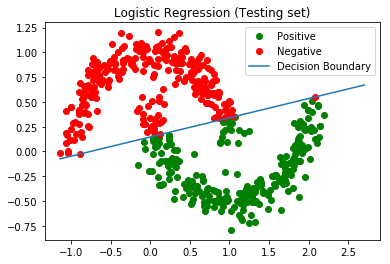

In [14]:
#import library
import numpy as np
import tensorflow as tf
#for evaluation 
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

##################################### GET DATASET AND SPLIT INTO TRAINING, VALIDATION, TESTING ################################
#get moon dataset
from sklearn.datasets import make_moons
#number of samples of moon dataset
m = 2000
#learning rate for optimization
lr = 0.1
#get features and labels of moon dataset
X_moons, y_moons = make_moons(m, noise=0.1)
#creating array of bias
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons_column_vector = y_moons.reshape(-1, 1)
#splitting data into training, validation and testing dataset
X_train = X_moons_with_bias[:1000]
X_val = X_moons_with_bias[1001:1500]
X_test=X_moons_with_bias[1501:]

y_train = y_moons_column_vector[:1000]
y_val = y_moons_column_vector[1001:1500]
y_test = y_moons_column_vector[1501:]

#function to create batches randomly
def random_batch(X_train, y_train, batch_size):
  #get random integer
    nb = np.random.randint(0, len(y_train), batch_size)
    X_batch = X_train[nb]
    y_batch = y_train[nb]
    return X_batch, y_batch
    
n_inputs = 2
########################################### CREATE PLACEHOLDERS AND VARIABLES ################################################
#placeholder for features and labels
X = tf.placeholder(tf.float32, shape=(None, n_inputs+1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1 ), name="y")
#placeholder for weights 
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=42), name="theta")
#calculate logits for prediction value
logits = tf.matmul(X, theta, name="logits")
#get the probabilities
y_prob = tf.sigmoid(logits)
#logarithmic cross entropy loss 
loss = tf.losses.log_loss(y, y_prob)
#optimizing gradient using defined learning rate  
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
training_op = optimizer.minimize(loss)

#to initialize all variables
init = tf.global_variables_initializer()

n_epochs = 1000
batch_size = 50
#get batch range 
n_batches = int(np.ceil(m / batch_size))
########################################################## RUN THE SESSION ###################################################
with tf.Session() as sess:
  #initializing all variables
    sess.run(init)
    
    for epoch in range(n_epochs):
        #create batches 
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_train, y: y_train})
        
        if epoch % 100 == 0:
          #evaluate the score on training and validation data
            y_prob_val = y_prob.eval(feed_dict={X: X_train, y: y_train})
            y_pred = (y_prob_val >=0.5 )
            pred = precision_score(y_train, y_pred)
            print("Epoch:", epoch, "\tLoss:", loss_val, "\tAccuracy:", pred*100)
            y_prob_val = y_prob.eval(feed_dict={X: X_val, y: y_val})
            y_pred = (y_prob_val >=0.5 )
            pred = precision_score(y_val, y_pred)
            print("Accuracy on Validation Dataset: ", pred*100)
            
            
    ##############################################################################################
    ################# Calculating loss on Training, Validation, Testing ##########################
    print("=======================================================================================")
    loss_val = loss.eval({X: X_train, y: y_train})
    print("Training Data Loss:", loss_val)
    loss_val = loss.eval({X: X_val, y: y_val})
    print("Validation Data Loss:", loss_val)
    loss_val = loss.eval({X: X_test, y: y_test})
    print("Testing Data Loss:", loss_val)
    print("=======================================================================================")
    ##################################################################################################
    ################# Calculating accuracy on Training, Validation, Testing ##########################
    y_prob_val = y_prob.eval(feed_dict={X: X_train, y: y_train})
    #check for probability to classify for class-1 or class-0
    y_pred = (y_prob_val >=0.5 )
    pred = precision_score(y_train, y_pred)
    print("Accuracy on Training:", pred*100)
        
    y_prob_val1 = y_prob.eval(feed_dict={X: X_val, y: y_val})
    y_pred1 = (y_prob_val1 >=0.5 )
    pred1 = precision_score(y_val, y_pred1)
    print("Accuracy on Validation:", pred1*100)
    
    y_prob_val2 = y_prob.eval(feed_dict={X: X_test, y: y_test})
    y_pred2 = (y_prob_val2 >=0.5 )
    pred2 = precision_score(y_test, y_pred2)
    print("Accuracy on Testing:", pred2*100)
    ################################ PLOTTING DECISION BOUNDARY ON TRAINING DATASET ###########################################
    #get weights of trained model
    coeff=theta.eval()
    #print(coeff)
    # a 1D array rather than a column vector
    y_pred_idx = y_pred.reshape(-1) 
    #plotting class-1(Positive) and class-0(Negative) data
    plt.plot(X_train[y_pred_idx, 1], X_train[y_pred_idx, 2], 'go', label="Positive")
    plt.plot(X_train[~y_pred_idx, 1], X_train[~y_pred_idx, 2], 'ro', label="Negative")
    #get min and max of training data fosr X axis
    #adding 1 and 1.5 to make decision boundary line longer on the plot
    x_values = [np.min(X_train[:, 1] ), np.max(X_train[:, 2])+1.5]
    #get decision boundary which is weighted sum 
    y_values = - (coeff[0][0] + np.dot(coeff[1][0], x_values)) / coeff[2][0]
    plt.plot(x_values, y_values, label='Decision Boundary')
    
    plt.legend()
    plt.title('Logistic Regression (Training set)')
    plt.show()
    ################################ PLOTTING DECISION BOUNDARY ON VALIDATION DATASET #########################################
    
    y_pred_idx1 = y_pred1.reshape(-1) 
    plt.plot(X_val[y_pred_idx1, 1], X_val[y_pred_idx1, 2], 'go', label="Positive")
    plt.plot(X_val[~y_pred_idx1, 1], X_val[~y_pred_idx1, 2], 'ro', label="Negative")
    
    x_values = [np.min(X_val[:, 1] ), np.max(X_val[:, 2])+1.5]
    y_values = - (coeff[0][0] + np.dot(coeff[1][0], x_values)) / coeff[2][0]
    plt.plot(x_values, y_values, label='Decision Boundary')
    
    plt.legend()
    plt.title('Logistic Regression (Validation set)')
    plt.show()
    ################################ PLOTTING DECISION BOUNDARY ON TESTING DATASET #############################################
    
    y_pred_idx2 = y_pred2.reshape(-1) # a 1D array rather than a column vector
    plt.plot(X_test[y_pred_idx2, 1], X_test[y_pred_idx2, 2], 'go', label="Positive")
    plt.plot(X_test[~y_pred_idx2, 1], X_test[~y_pred_idx2, 2], 'ro', label="Negative")
    
    x_values = [np.min(X_test[:, 1] ), np.max(X_test[:, 2])+1.5]
    y_values = - (coeff[0][0] + np.dot(coeff[1][0], x_values)) / coeff[2][0]
    plt.plot(x_values, y_values, label='Decision Boundary')

    plt.legend()
    plt.title('Logistic Regression (Testing set)')
    plt.show()
    

## Using tf.Keras() (Task 5)

In [15]:
from tensorflow.keras import layers
#################################### BUILD AND TRAIN THE MODEL #########################################################
#build the model with dense layer having sigmoid activation function for binary classification
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(3,), activation='sigmoid')])
#using adam as optimizer and binary crossentropy 
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
#training the model for 1000 iteration and checks on validation data
history = model.fit(X_train, y_train,  epochs=1000,validation_data=(X_val, y_val))
########################################### EVALUATE THE MODEL #########################################################
print('=================================================================================================================')
#evaluate the training,validation, testing dataset and get loss and accuracy
loss, accuracy=model.evaluate(X_train, y_train)
print('Training Dataset: Loss: ',loss , '\t Accuracy:',accuracy)
loss, accuracy=model.evaluate(X_val, y_val)
print('Validation Dataset: Loss: ',loss , '\t Accuracy:',accuracy)
loss, accuracy=model.evaluate(X_test, y_test)
print('Testing Dataset: Loss: ',loss , '\t Accuracy:',accuracy)
print('=================================================================================================================')


Train on 1000 samples, validate on 499 samples
Epoch 1/1000
1000/1000 [==============================] - 0s 293us/sample - loss: 0.6252 - acc: 0.6600 - val_loss: 0.6053 - val_acc: 0.6754
Epoch 2/1000
1000/1000 [==============================] - 0s 52us/sample - loss: 0.6067 - acc: 0.6790 - val_loss: 0.5878 - val_acc: 0.6934
Epoch 3/1000
1000/1000 [==============================] - 0s 50us/sample - loss: 0.5899 - acc: 0.7020 - val_loss: 0.5715 - val_acc: 0.7174
Epoch 4/1000
1000/1000 [==============================] - 0s 53us/sample - loss: 0.5742 - acc: 0.7170 - val_loss: 0.5568 - val_acc: 0.7375
Epoch 5/1000
1000/1000 [==============================] - 0s 50us/sample - loss: 0.5597 - acc: 0.7350 - val_loss: 0.5429 - val_acc: 0.7575
Epoch 6/1000
1000/1000 [==============================] - 0s 52us/sample - loss: 0.5466 - acc: 0.7410 - val_loss: 0.5306 - val_acc: 0.7695
Epoch 7/1000
1000/1000 [==============================] - 0s 51us/sample - loss: 0.5345 - acc: 0.7580 - val_loss: 0.51

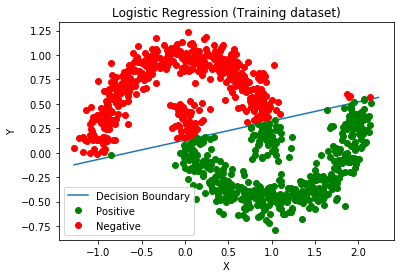

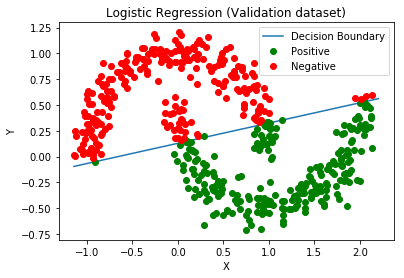

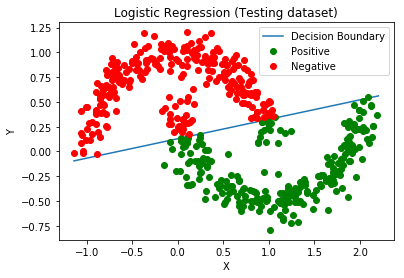

In [16]:
#get weights of the trained model
weights=model.get_weights()
coeff1=weights[0]
############################### PLOTTING DECISION BOUNDARY ON TRAINING DATASET ################################################
classes=model.predict(X_train)
#check for probability, if >0.5 then class-1 else class-0
y_pred = (classes >=0.5 )
#get min max of training data for X-axis
x_values = [np.min(X_train[:, 1] ), np.max(X_train[:, 2])+1]
#weighted sum of inputs to get decision boundary
y_values = - (coeff1[0][0] + np.dot(coeff1[1][0], x_values)) / coeff1[2][0]
plt.plot(x_values, y_values, label='Decision Boundary')
# a 1D array rather than a column vector
y_pred_idx2 = y_pred.reshape(-1)
#plot the data
plt.plot(X_train[y_pred_idx2, 1], X_train[y_pred_idx2, 2], 'go', label="Positive")
plt.plot(X_train[~y_pred_idx2, 1], X_train[~y_pred_idx2, 2], 'ro', label="Negative")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression (Training dataset)')
plt.legend()
plt.show()
############################# PLOTTING DECISION BOUNDARY ON VALIDATION DATASET ################################################
classes=model.predict(X_val)
y_pred1 = (classes >=0.5 )

x_values = [np.min(X_val[:, 1] ), np.max(X_val[:, 2])+1]
y_values = - (coeff1[0][0] + np.dot(coeff1[1][0], x_values)) / coeff1[2][0]
plt.plot(x_values, y_values, label='Decision Boundary')

y_pred_idx2 = y_pred1.reshape(-1) 
plt.plot(X_val[y_pred_idx2, 1], X_val[y_pred_idx2, 2], 'go', label="Positive")
plt.plot(X_val[~y_pred_idx2, 1], X_val[~y_pred_idx2, 2], 'ro', label="Negative")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression (Validation dataset)')
plt.legend()
plt.show()

################################# PLOTTING DECISION BOUNDARY ON TESTING DATASET ###############################################
classes=model.predict(X_test)
y_pred = (classes >=0.5 )

x_values = [np.min(X_test[:, 1] ), np.max(X_test[:, 2])+1]
y_values = - (coeff1[0][0] + np.dot(coeff1[1][0], x_values)) / coeff1[2][0]
plt.plot(x_values, y_values, label='Decision Boundary')

y_pred_idx2 = y_pred.reshape(-1) 
plt.plot(X_test[y_pred_idx2, 1], X_test[y_pred_idx2, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx2, 1], X_test[~y_pred_idx2, 2], 'ro', label="Negative")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression (Testing dataset)')
plt.legend()
plt.show()